In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q kaggle
from google.colab  import files
files.upload()

Saving advertising.csv to advertising.csv


{'advertising.csv': b'TV,Radio,Newspaper,Sales\r\n230.1,37.8,69.2,22.1\r\n44.5,39.3,45.1,10.4\r\n17.2,45.9,69.3,12\r\n151.5,41.3,58.5,16.5\r\n180.8,10.8,58.4,17.9\r\n8.7,48.9,75,7.2\r\n57.5,32.8,23.5,11.8\r\n120.2,19.6,11.6,13.2\r\n8.6,2.1,1,4.8\r\n199.8,2.6,21.2,15.6\r\n66.1,5.8,24.2,12.6\r\n214.7,24,4,17.4\r\n23.8,35.1,65.9,9.2\r\n97.5,7.6,7.2,13.7\r\n204.1,32.9,46,19\r\n195.4,47.7,52.9,22.4\r\n67.8,36.6,114,12.5\r\n281.4,39.6,55.8,24.4\r\n69.2,20.5,18.3,11.3\r\n147.3,23.9,19.1,14.6\r\n218.4,27.7,53.4,18\r\n237.4,5.1,23.5,17.5\r\n13.2,15.9,49.6,5.6\r\n228.3,16.9,26.2,20.5\r\n62.3,12.6,18.3,9.7\r\n262.9,3.5,19.5,17\r\n142.9,29.3,12.6,15\r\n240.1,16.7,22.9,20.9\r\n248.8,27.1,22.9,18.9\r\n70.6,16,40.8,10.5\r\n292.9,28.3,43.2,21.4\r\n112.9,17.4,38.6,11.9\r\n97.2,1.5,30,13.2\r\n265.6,20,0.3,17.4\r\n95.7,1.4,7.4,11.9\r\n290.7,4.1,8.5,17.8\r\n266.9,43.8,5,25.4\r\n74.7,49.4,45.7,14.7\r\n43.1,26.7,35.1,10.1\r\n228,37.7,32,21.5\r\n202.5,22.3,31.6,16.6\r\n177,33.4,38.7,17.1\r\n293.6,27.7,1.8,20

In [3]:
!mkdir -p -/. kaggle
!cp kaggle.json-/kaggle/
!chmod 600 -/.kaggle/kaggle.json
!kaggle datasets download kaggle kernels pull ashydv/sales-prediction-simple-linear-regression
!unzip advertising.zip

mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.
cp: missing destination file operand after 'kaggle.json-/kaggle/'
Try 'cp --help' for more information.
chmod: invalid option -- '/'
Try 'chmod --help' for more information.
usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: unrecognized arguments: kernels pull ashydv/sales-prediction-simple-linear-regression
unzip:  cannot find or open advertising.zip, advertising.zip.zip or advertising.zip.ZIP.


In [4]:
file_path= '/content/advertising.csv'
import pandas as pd
df=pd.read_csv(file_path)
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [5]:
print(df.head())
print(df.info())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df = df.dropna()

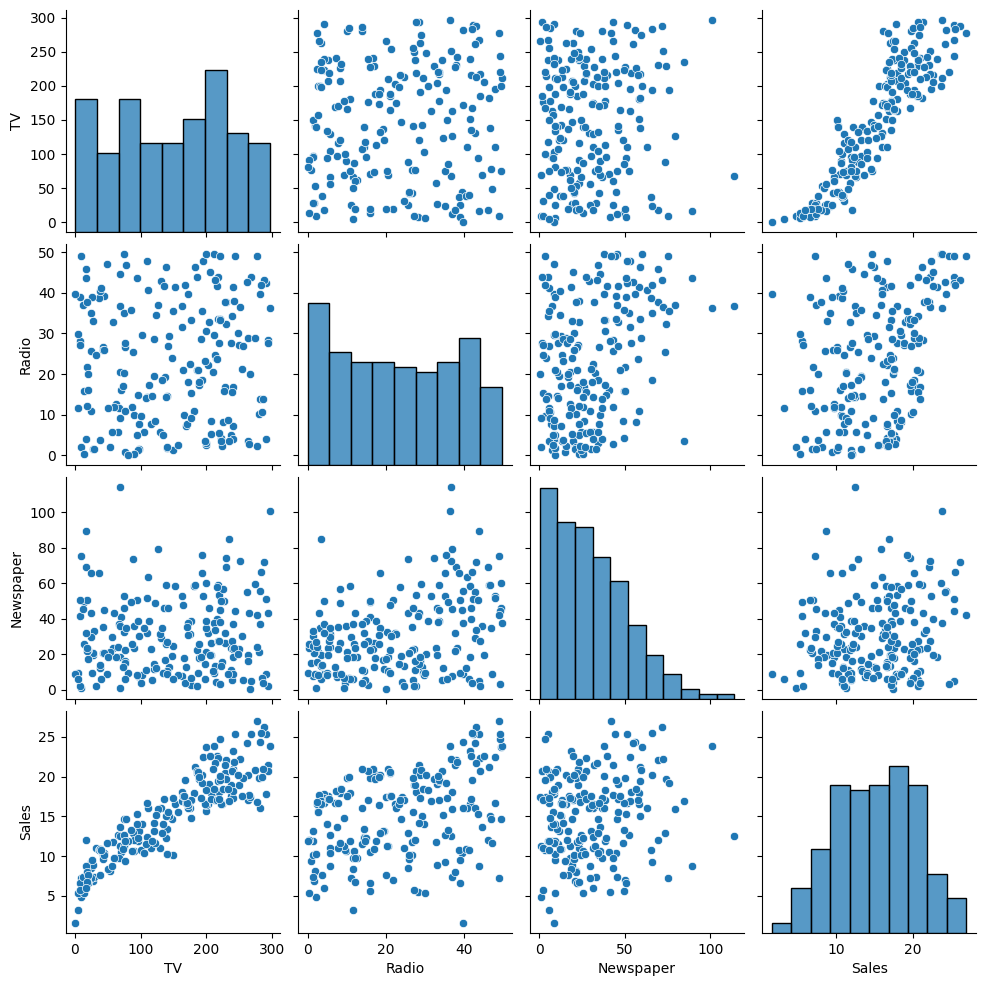

In [8]:
sns.pairplot(df)

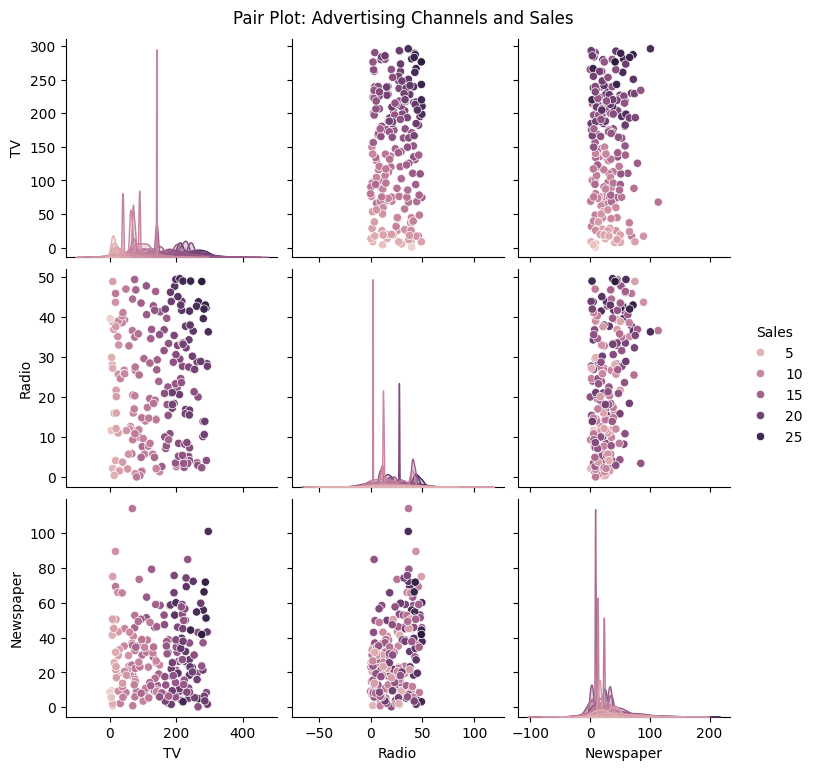

In [9]:
sns.pairplot(df, hue="Sales", diag_kind="kde")
plt.suptitle("Pair Plot: Advertising Channels and Sales", y=1.02)
plt.show()

In [10]:
fig = px.violin(df, x="Sales", y="Newspaper",
                color="Newspaper", box=True, points="all",
                    title="Violin Plot: Sales Distribution by Newspaper Spend")

fig.show()

In [11]:
fig = px.line(df, x="Sales", y="TV",
                  color="Newspaper",
                  title="Interactive Line Chart: TV Spend vs. Sales")

fig.show()

In [12]:
fig = px.scatter_3d(df, x='TV', y='Radio', z='Newspaper', color='Sales')
fig.update_layout(title='Sales vs. TV and Radio Advertising Spend')
fig.show()

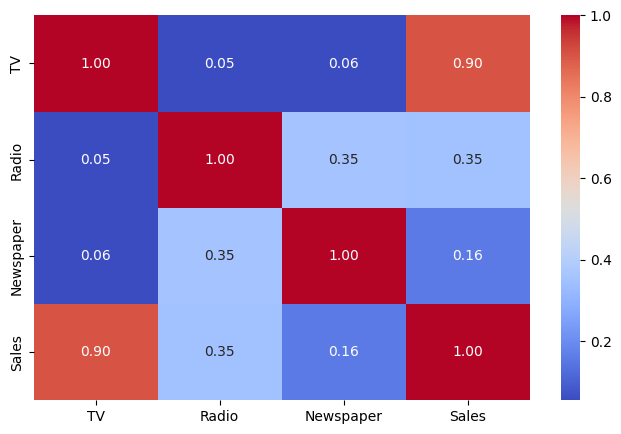

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot= True, cmap= 'coolwarm',fmt=".2f")
plt.show()

In [14]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Random Forest - MAE: {mae}, MSE: {mse}, R2: {r2}")

Random Forest - MAE: 0.9171499999999992, MSE: 1.4368395500000006, R2: 0.9535019934565436




1.    **There is a strong positive correlation between advertising spending on TV, Radio, and Newspaper and overall sales. This suggests that increasing advertising investment across these channels has the potential to drive higher sales figures.**

2.   **TV and Radio advertising appear to be the most influential channels for driving sales. This is evident from the higher correlation coefficients observed in the heatmap and the feature importance analysis of the model. Investing strategically in these channels could yield a higher return on investment compared to Newspaper advertising.**

3.    **While Newspaper advertising does show a positive correlation with sales, its impact appears to be less significant compared to TV and Radio.**

4.    **The Random Forest Regressor model demonstrated a good level of accuracy in predicting sales, as indicated by the high R2 score and low mean absolute error. This suggests that the model can be reliably used to forecast sales based on advertising spending across the three channels.**
